# Results when investigating IMDb-movies

Welcome to the Python_Course_2025 repository, result section! This section is dedicated to the final results of the hypotheses-testing with illustrations, discussion and conclusion for the course " HEL-8048 Programming and Data Visualization for Researchers"
*Further investigation of each hypothesis is found in the folder "/Scripts".*

## Overview
In this project I used various Python libraries and tools to create visualizations that summarize 1500 movies described in IMDb. You can find background information of the dataset and import-information in the homepages' README.md.

In this project I wanted to test five hypotheiss based on properties of the data itself: 

H1: Movies with a higher number of reviews are more popular — and therefore, I have likely seen them.
H2: The number of reviews is positively correlated with the number of ratings.  
H3: Movies released in 2010 or later tend to receive higher ratings than older movies.  
H4: The "Action" genre has become more popular over recent decades.  
H5: Most movies in the dataset fall under the **PG-13** category, as blockbuster movies often aim for this rating to maximize audience reach.

#### Setup
To sort out and create an illustration of the top reviewed movies, I installed the Python libraries (answer to learning goal 2.4 in rubric):
* **Pandas**: For data manipultaion, gives me the opportuinity to create structures like DataFrame, filtering and grouping.
* **Matplotlib**: A plotting library to create visualizations like histograms, scatter plots, line plots etc.
* **Seaborn**: Create a more informative statistical graph

---


## Table of contents
*I created this with a similar structure as my README.md file, with links to the different titles, making it easier to navigate*

1. [Project Overview](#Results-when-investigating-IMDb-movies)
2. [Setup](#Setup)
3. [Hypothesis 1: Poular review](#Hypothesis-1)
4. [Hypothesis 2: Review vs. raters](#Hypothesis-2)
5. [Hypothesis 3: Release year and rating](#Hypothesis-3)
6. [Hypothesis 4: Action movies](#Hypothesis-4)
7. [Hypothesis 5: Age rating](#Hypothesis-5)
8. [Summary and resources](#Summary)


---

## Setup
To sort out and create illustrations of the IMDb-movies,  I installed the Python libraries (answer to learning goal 2.4 in rubric):

* **Pandas**: For data manipultaion, gives me the opportuinity to create structures like DataFrame, filtering and grouping.
* **Matplotlib**: A plotting library to create visualizations like histograms, scatter plots, line plots etc.
* **Seaborn**: Create a more informative statistical graph

In [34]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [35]:
# Import data
# Create DataFrame to access items in dataset
data_path = "../data/merged_dataset.csv"

df = pd.read_csv(data_path)

In [36]:
# Check if the dataframe work
df

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003 (USA),8.9,1593859,3681
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002 (USA),8.7,1440188,2559
...,...,...,...,...,...,...,...,...,...
1495,Catch-22,1970,R,2h 2min,Comedy; Drama; War;,24 June 1970 (USA),7.1,21424,145
1496,The Great Raid,2005,R,2h 12min,Action; Drama; War;,12 August 2005 (USA),6.7,20965,194
1497,Saints and Soldiers,2003,PG-13,1h 30min,Action; Drama; War;,25 March 2005 (USA),6.7,19730,163
1498,Stop-Loss,2008,R,1h 52min,Drama; War;,28 March 2008 (USA),6.4,19456,102


In [37]:
#I want to check which data types the columns are
print(df.dtypes)
#This is to check if e.g. year is a numeric format.

name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating          float64
num_raters        int64
num_reviews       int64
dtype: object


In [38]:
# Convert number of raters and number of reviewes to numeric, in case of issues
df["num_raters"] = pd.to_numeric(df["num_raters"], errors="coerce")
df["num_reviews"] = pd.to_numeric(df["num_reviews"], errors="coerce")

# Drop rows with missing values in the columns
df = df.dropna(subset=["num_raters", "num_reviews"])

In [39]:
#I want to take a look at the different genres to make sure that "Action" is in there.
unique_genres = df['genres'].unique()
print(unique_genres)

['Action; Adventure; Sci-Fi; ' 'Action; Adventure; Drama; '
 'Adventure; Drama; Fantasy; ' 'Action; Adventure; '
 'Adventure; Drama; Sci-Fi; ' 'Adventure; Drama; War; '
 'Action; Adventure; Fantasy; ' 'Action; Adventure; Comedy; '
 'Adventure; Comedy; Sci-Fi; ' 'Animation; Adventure; '
 'Animation; Adventure; Comedy; ' 'Animation; Adventure; Drama; '
 'Adventure; Fantasy; ' 'Adventure; Comedy; Crime; '
 'Animation; Action; Adventure; ' 'Action; Adventure; Thriller; '
 'Action; Adventure; Mystery; ' 'Action; Adventure; Horror; '
 'Adventure; Sci-Fi; ' 'Adventure; Mystery; Sci-Fi; '
 'Adventure; Biography; Drama; ' 'Adventure; Thriller; '
 'Animation; Comedy; ' 'Animation; Fantasy; '
 'Animation; Adventure; Fantasy; ' 'Animation; Drama; '
 'Animation; Drama; War; ' 'Animation; Action; Comedy; '
 'Animation; Comedy; Fantasy; ' 'Animation; Drama; Fantasy; '
 'Animation; Comedy; Drama; ' 'Animation; Drama; Sci-Fi; '
 'Biography; Drama; History; ' 'Biography; Crime; Drama; '
 'Biography; Dra

---
## Hypothesis 1
# Top Movies by Number of Reviews

In IMDb, everyone can give a review of a movie. This can include star rating, recommendation and a detailed review. I want to take a look at the most reviewed movies to see if I am familiar with them.

### Objective
* **Goal:** Sort out the six most reviewed movies.
* **Hypotheses 1:** Movies with a higher number of reviews are more popular — and therefore, I have likely seen them.  

#### Why this figure:
I use a barchart, making it easy to visualize the top movies in the right order, and see whivh one is on the top based on number of reviews. It was important for me to make the x-axis go from 0 to 10000+ because of the "Principal of proportional ink". I don't want to fool the viewer.

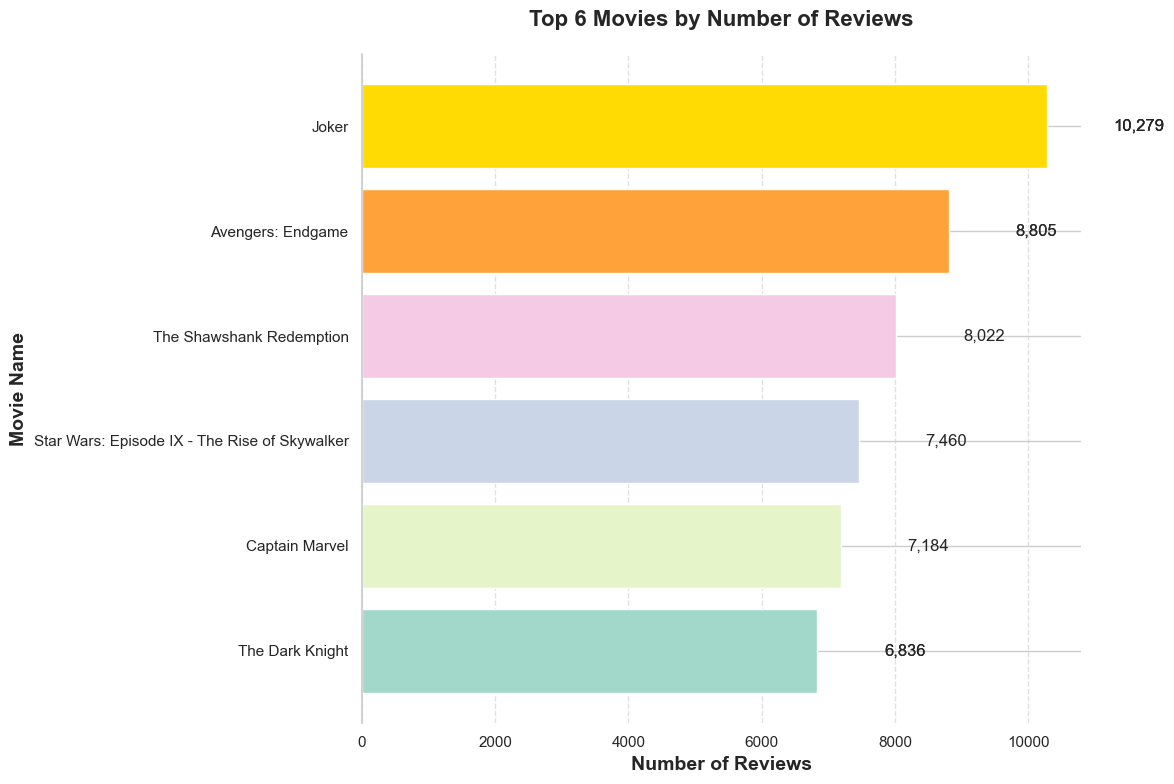

In [40]:
#Set the font size, make it easier to read
plt.rcParams.update({"font.size": 12})

# Sort the movies by "num_reviews" in descending order and get the top 6
top_movies = df[["name", "num_reviews"]].sort_values(by="num_reviews", ascending=False).head(10)

# Custom color palette from seaborn, I want "easter" vibe
# Inspired by seaborn color palet "Pastel2"
colors = ["#CBD5E8", "#E6F5C9", "#FFDA03", "#a1d8ca", "#FFA23A", "#F4CAE4"]

# Plotting
plt.figure(figsize=(12,8)) #bar chart
bars = plt.barh(top_movies['name'], top_movies['num_reviews'], color=colors)
plt.title('Top 6 Movies by Number of Reviews', fontsize=16, pad=20, fontweight= "bold")
plt.xlabel('Number of Reviews', fontsize=14, fontweight="bold")
plt.ylabel('Movie Name', fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()

# Adding data labels
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=12)

# Adding gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Adjust layout to prevent cropping
plt.tight_layout()

#removes top, right and bottom line
sns.despine(left=False, bottom=True)

# Save and show the plot
plt.savefig('../plots/H1_Exam.png') #saving the plot under the plots section
plt.show()

### Conclusion
The six most reviewed movies is sorted and illustrated in the order: Joker, The Shawshank redemption, Star Wars episode IX - the rise of skywalker, Captain Marvel and The dark knight. 

My hypothesis was: Movies with a higher number of reviews are more popular, and therefor I have seen them.

This is partially correct. I have watched 2/3 of the movies. Joker is most popular by number of reviewers, I have seen this and liked it a lot! Further, one can go into IMDb and look at what people write about the movies. Further investigation of popularity is visualized in hypothesis XX.


---

## Hypothesis 2
# Number of reviews vs. number of ratings

In IMDb, everyone can give a review and a rating of a movie. I want to see if there is a correlation between number of user reviews and number of user ratings.

### Objective
* **Goal:** Create a correlation plot of reviews vs. ratings
* **Hypothesis 2:** The number of reviews is positively correlated with the number of ratings.

The number of rewiews and ratings is already converted to numeric, and rows with missing values is dropped. 
When I looked at the different genres, I could see that "Action" was present.

#### Why this figure:
I use a *regplot* to show the individual data points (scatter), answering does variable A increase when variable B increases. By adding an regression line, I make it easier to spot trends/correlations.

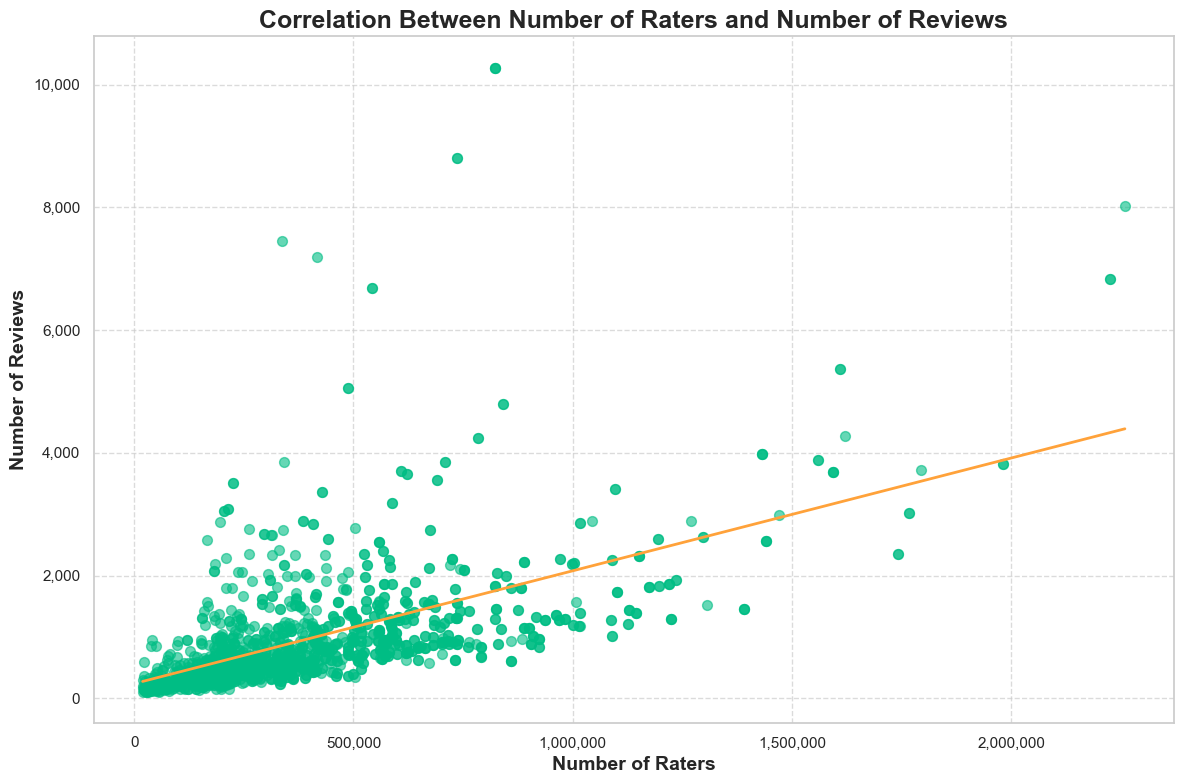

In [48]:
# Set the Seaborn style
sns.set(style="whitegrid", palette="muted")

#Importere funcformatter
from matplotlib.ticker import FuncFormatter

# Create a more refined scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(x="num_raters", y="num_reviews", data=df,
            scatter_kws={"s": 50, "alpha": 0.6, "color": "#00bd84"},  # Adjusted scatter size and transparency
            line_kws={"color": "#FFA23A", "linewidth": 2}, 
            ci=None)  # Disable confidence interval for a cleaner plot

# Define the formatter function to add commas
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')

# Apply the formatter to the axes
plt.gca().xaxis.set_major_formatter(formatter) #The formatter is designed to format the numbers with commas (e.g., 1,000,000 instead of 1e6).
plt.gca().yaxis.set_major_formatter(formatter)

# Customize the plot appearance
plt.title("Correlation Between Number of Raters and Number of Reviews", fontsize=18, fontweight="bold")
plt.xlabel("Number of Raters", fontsize=14, fontweight="bold")
plt.ylabel("Number of Reviews", fontsize=14, fontweight="bold")

# Add gridlines for better context
plt.grid(True, linestyle="--", alpha=0.7)

# Saving the plot to the Plots folder
plt.savefig('../plots/H2_Exam.jpg')


# Show the plot
plt.tight_layout()  # Ensures everything fits within the window
plt.show()

### Conclusion
I wanted to see if there is a correlation between number of reviews and number of raters. It does not seem like a stong correlation, it seemms more like a fan-plot with some extreme outliers. 

From the conclusion of H1 we know that the outliers with most reviews is *Joker* with 10.279 reviews. The second is *Avangers: Endgame*, and the third is *The Shawshank Redemption*. We can see that the movie with the most number of raters is *The Shawshank redemption*. 

---

## Hypothesis 3
# Relase year vs. Avaraage rating

I want to take a look at the evolvement of IMDb rating. Since 2000 the technology-competancy and gear has increased massively, and I believe this has affected the movies as well. Today we have better CGI, backdrops, higher resolution etc. Therefor I believe newer movies tend to get better ratings.

### Objective:
* **Goal** Create a line-plot with the avarage rating by year, to see if newer movies get higher ratings.
* **Hypothesis 3** Movies from 2010 and after tend to receive higher ratings than older movies.

#### Why this figure:
A line-plot makes it easer to see the differences in avarage rating by year. If I take out the lines it would be more disturbing to see any patterns. 


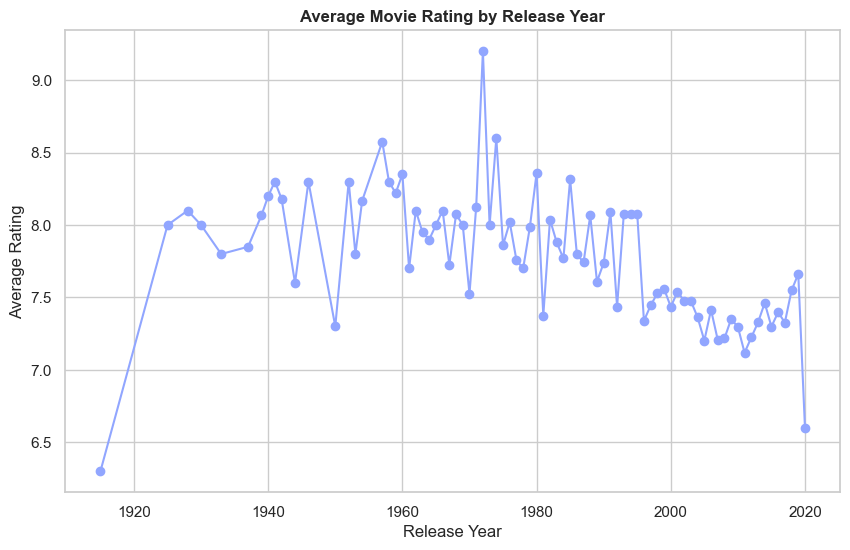

In [42]:
# group by "release year" and calculate the avarage rating for each year
avg_ratings_per_year = df.groupby("year")["rating"].mean().reset_index()

#creating a plot
plt.figure(figsize=(10,6))
plt.plot(avg_ratings_per_year['year'], avg_ratings_per_year['rating'], marker='o', linestyle='-', color="#91A6FF")
plt.title('Average Movie Rating by Release Year', fontweight = "bold")
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)


# Saving the plot to the Plots folder
plt.savefig('../plots/H3_Exam.jpg')

plt.show()

In [43]:
# Find the highest-rated movie
highest_rated_movie = df.loc[df['rating'].idxmax()] #find the index of the maximu, value in the rating column
# Display the result
print("Highest Rated Movie:")
print(f"Title: {highest_rated_movie['name']}")
print(f"Rating: {highest_rated_movie['rating']}")

Highest Rated Movie:
Title: The Shawshank Redemption
Rating: 9.3


### Conclusion

The plot illustrates a peak in ratings for movies around 1970-1980. Overall, it appears that newer movies tend to receive lower average ratings. This is contrary to my hypothesis that movies from 2010 and after receive higher ratings.
This might be because of the industry of producing movies faster then before...making the storyline worse.

Anyway, based on these three hypotheses it is obvious that I should watch *"The Shawshank Redemption"*, the highest rated movie with top 5 most reviews and rates!

---


## Hypothesis 4
# Action-movies by year

In IMDb the movies are sorted by genre e.g. action, crime, comedie or romance. Each movie in the dataset has usually two to three different genres - making it easier to sort out what type of movie it is.

### Objective
* **Goal:** Sort out the action movies (movies including action as a genre) and create a linegraph to illustrate the action-movies by year.
* **Hypothesis 4:** The movie genre "Action" have become more popular over the decades

#### Why this figure:
I created a lineplot to get a visual understanding, without the lines it would be more difficult to differeniate the data points. 

Tha gaussian model was created for fun, you can see in my conclusions that I do not think it was suitable in this case.

In [44]:
#Action is included in several genres.
#I want to look at "action" and "year". 

# Create a datarame (action_movies) that only includes movies classified under the "Action" genre.
action_movies = df[df["genres"].str.contains('Action', na=False)] #Selecting genres column from datafram, check if the column contains the word action, na=False, ensure that missing values are treated as False.
action_movies_per_year = action_movies.groupby('year').size() #Group the action movies by year

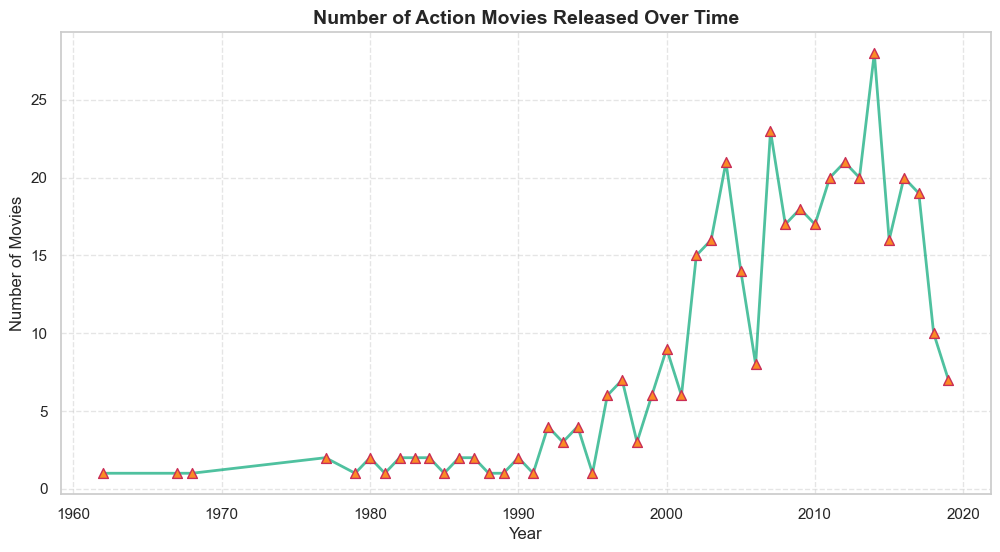

In [45]:
years = action_movies_per_year.index
counts = action_movies_per_year.values

plt.figure(figsize=(12, 6))

# Plot the line
plt.plot(years, counts, color="#04A777", linestyle="-", linewidth=2, alpha=0.7)  # Light gray line

# Scatter plot with color scale
sc = plt.scatter(years, counts, c="#FB8B24", marker ="^", edgecolors="#CA2E55", s=50, zorder=3)  #choosing size of points, edges, color, marker (triangle) etc.

# Labels and grid
plt.title("Number of Action Movies Released Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.savefig('../plots/H4.1_Exam.png')

plt.show()

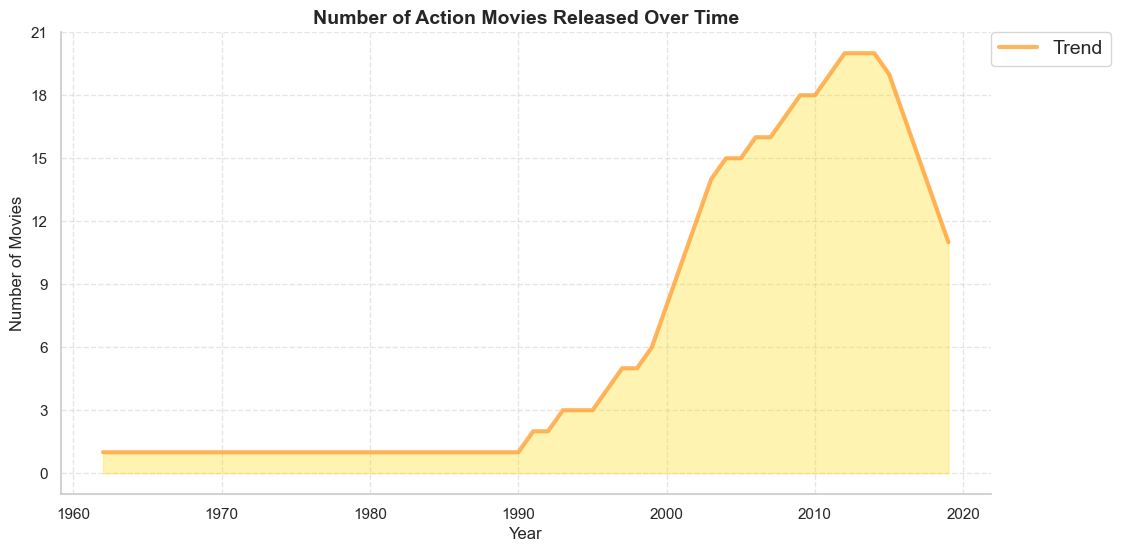

In [46]:
# I want to make a smooth plot based on gausian filtering with the Scipy-library (module)
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import MaxNLocator #for integer numbers instead of decimals on the y-axis

# Sample data
years = action_movies_per_year.index
counts = action_movies_per_year.values

# Smooth the line using Gaussian filtering
smooth_counts = gaussian_filter1d(counts, sigma=2)

plt.figure(figsize=(12, 6))
plt.plot(years, smooth_counts, color="#FFA23A", linewidth=3, label="Trend", alpha=0.8)
plt.fill_between(years, smooth_counts, color="#FFDA03", alpha=0.3)  # Adds a nice shaded effect

# Force integer values on the y-axis
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Number of Action Movies Released Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

#removes top, right and bottom line
sns.despine(left=False, bottom=False)

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0., fontsize=14)


plt.savefig('../plots/H4.2_Exam.png')

plt.show()


### Conclusion

Even though the gausian figure clearly illustrate an increase in the number of action movies after year 2000, the scatterplot with line create a better illustration of the reality. It's been up and down ;) 

---

## Hypothesis 5
# Distribution of movie ratings
Movies are rated by different categories such as G, PG, PG-13, R and so on. 
Some of the classifaction of ratings are: 
* G: General Audiences. This program is designed to be appropriate for all ages.
* PG: Parental Guidance Suggested. Parents are urged to give parental guidance.
* PG-13: Parents Strongly Cautioned. Some material may not be suited for children under age 13.
* R: Restricted.
* NC-17: Clearly Adult.

### Objective
* **Goal:** Count occurannces of each rating, filter out the rare ones and create a pieplot to show the proportions of movies categorized with G, PG, PG-13 and R.
* **Hypothesis 5:** Most movies in the dataset fall under the **PG-13** category, as blockbuster movies tend to aim for this rating to maximizee audience reach

#### Why this figure:

A pie chart makes it easy to visualize differences in proportions, I believe you get a good enough understanding of the different age ratings based on this figure. 

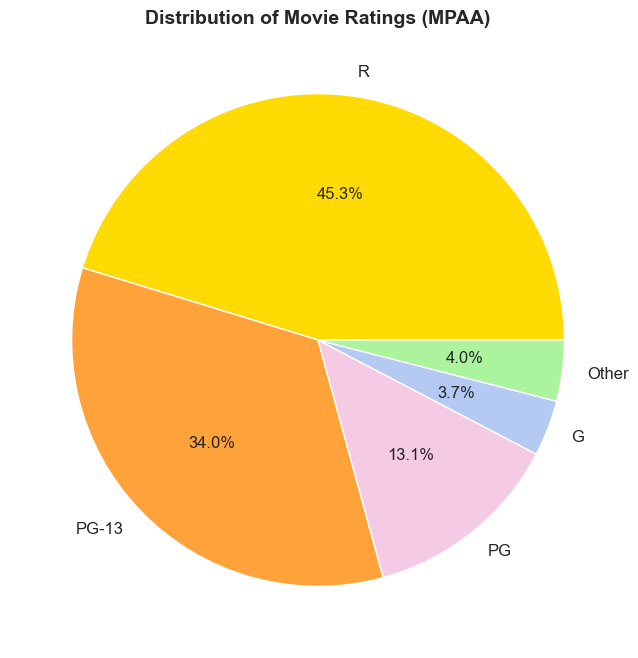

In [47]:
# Count occurrences of each MPAA rating
rating_counts = df['movie_rated'].value_counts()

# Define a threshold: If a rating appears less than X times, group it as "Other"
threshold = 50  # Adjust based on your dataset
rating_counts_filtered = rating_counts.copy()
rating_counts_filtered[rating_counts < threshold] = 0  # Set small categories to 0

# Add an "Other" category
rating_counts_filtered["Other"] = rating_counts[rating_counts < threshold].sum()

# Remove categories that were merged into "Other"
rating_counts_filtered = rating_counts_filtered[rating_counts_filtered > 0]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts_filtered, labels=[f"{label}" for label in rating_counts_filtered.index], 
        autopct='%1.1f%%', textprops={'fontsize': 12,},
        colors=['#FFDA03', '#FFA23A', '#F4CAE4', "#b4caf2", '#ACF39D'])
plt.title("Distribution of Movie Ratings (MPAA)", fontsize=14, fontweight ="bold")

plt.savefig('../plots/H5_Exam.png')
plt.show()

### Conclusion

My hypothesis was incorrect. R is the most common rating category, but PG-13 is second most used. Thereafter PG and G is quite common. The 4.0% Other section includes filtered rating outcomes used less than 50 times (treshold). This was used to minimize many small labels and colors (including everything). 

---

## Summary

I have created different figures to test visualization-functions. Each figure illustrate and give an indication of the answer to my hypotheses. 

* The project is published online in my github repository: johjor/Python_Course_2025
* Purpose and use of project is stated in the README.md
* Data are accessible online on Kaggle. I used an API to retrieve data. Information about the data can be found at download_kaggle_dataset.ipynb
* The GNU liscense is described in the README.md, and in the LICENSE file.
* Authorhip, citation, use and copying is described in the RREADME.md file on the home page.
* I have used prgramming language: Python, Jupyter Notebook.
* The functions and methods should run properly.
* The code is commented, the variable names is readable, and it would be easy to understand in ten years.
* I illustrate knowledge of different data types, explaning the different libraries etc.
* There is custom visualization options, I have added my own design (Easter theme) beyond the default plots. E.g. changing color, stule, linewidt, fontweight..
* There is a description of resources used and consultet. 
* I have exported a PDF file from this script, justifying use of figure stule, reporting and analysis. 


### Resources used and consulted

As part of my exam preparation, I used ChatGPT and ChatUiT to gain a clearer understanding of different functions and explanations. It has been an iterative process where I’ve tried writing code on my own. After some trial and error (and eventual success) I asked for feedback on how I could improve. Over time (as can be seen in the /Scripts folder under the different hypotheses), I began making improvements on my own initiative, especially once I started understanding different functions, terms, and concepts more clearly.

Other resources I used:

* The Good Code Handbook: https://goodresearch.dev/

* Fundamentals of Data Visualization: https://clauswilke.com/dataviz/

* The Art of Readable Code: https://mcusoft.wordpress.com/wp-content/uploads/2015/04/the-art-of-readable-code.pdf

* YouTube videos shared by the professor, as well as additional videos to help me review certain concepts.

* I also used Google to find relevant discussions and solutions on forums where others had encountered similar issues.

**I feel that I’ve learned a lot in this course. My skills have grown from zero to something meaningful, and I’ll definitely continue using what I’ve learned in my own future research.**

---